# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [57]:
# Data manipulation modules
import pandas as pd
import numpy as np

# Plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import InterclusterDistance

# ML modules
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [45]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [46]:
km8 = KMeans(n_clusters=8)
km8.fit(X)
y_pred = km8.predict(X)
silhouette_score(X,y_pred)

0.5406824747857625

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [47]:
km5 = KMeans(n_clusters=5)
km5.fit(X)
y_pred = km5.predict(X)
silhouette_score(X,y_pred)

0.5489993239795691

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [48]:
km3 = KMeans(n_clusters=3)
km3.fit(X)
y_pred = km3.predict(X)
silhouette_score(X,y_pred)

0.5711381937868844

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

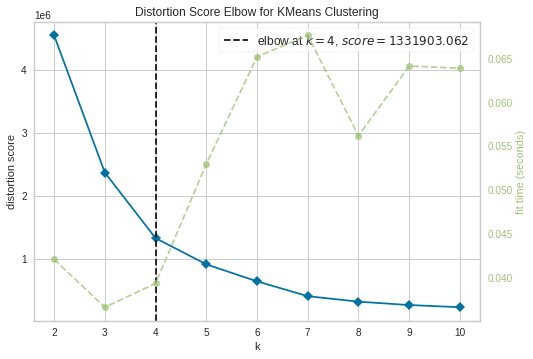

In [49]:
model = KMeans()
visualizer = KElbowVisualizer(model, metric='distortion',)
visualizer.fit(X)        
visualizer.show();

/home/linuxbrew/.linuxbrew/opt/python@3.8/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/linuxbrew/.linuxbrew/opt/python@3.8/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/linuxbrew/.linuxbrew/opt/python@3.8/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


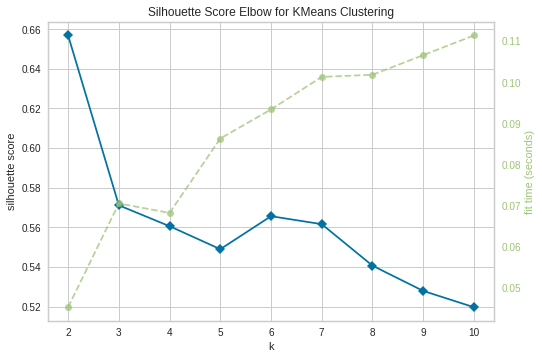

In [50]:
model = KMeans()
visualizer = KElbowVisualizer(model, metric='silhouette',)
visualizer.fit(X)        
visualizer.show();

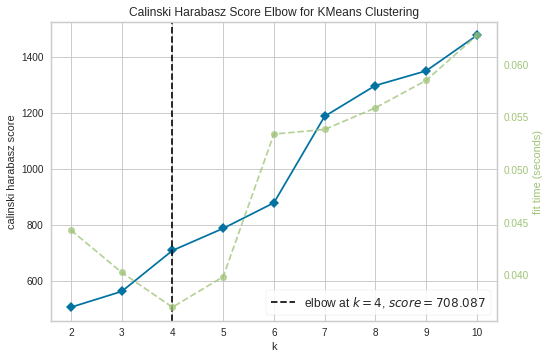

In [51]:
model = KMeans()
visualizer = KElbowVisualizer(model, metric='calinski_harabasz')
visualizer.fit(X)        
visualizer.show();

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

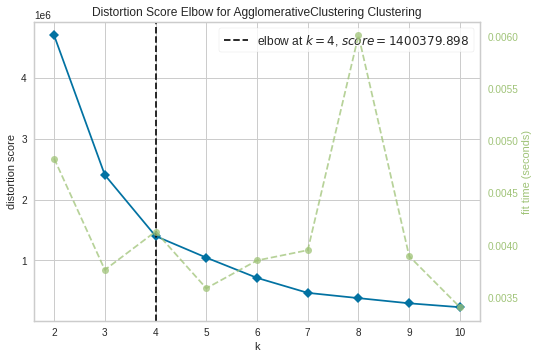

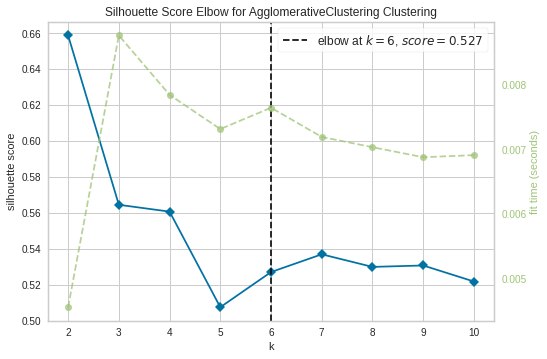

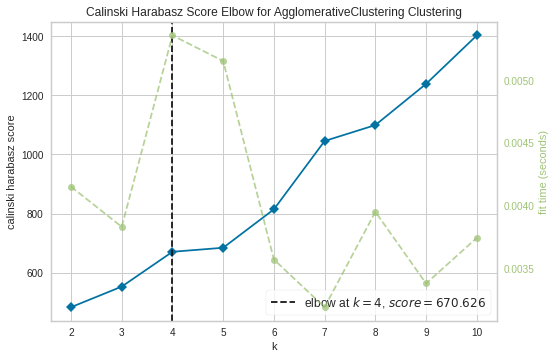

In [54]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, metric='distortion')
visualizer.fit(X)        
visualizer.show();

model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, metric='silhouette')
visualizer.fit(X)        
visualizer.show();

model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, metric='calinski_harabasz')
visualizer.fit(X)        
visualizer.show();


## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

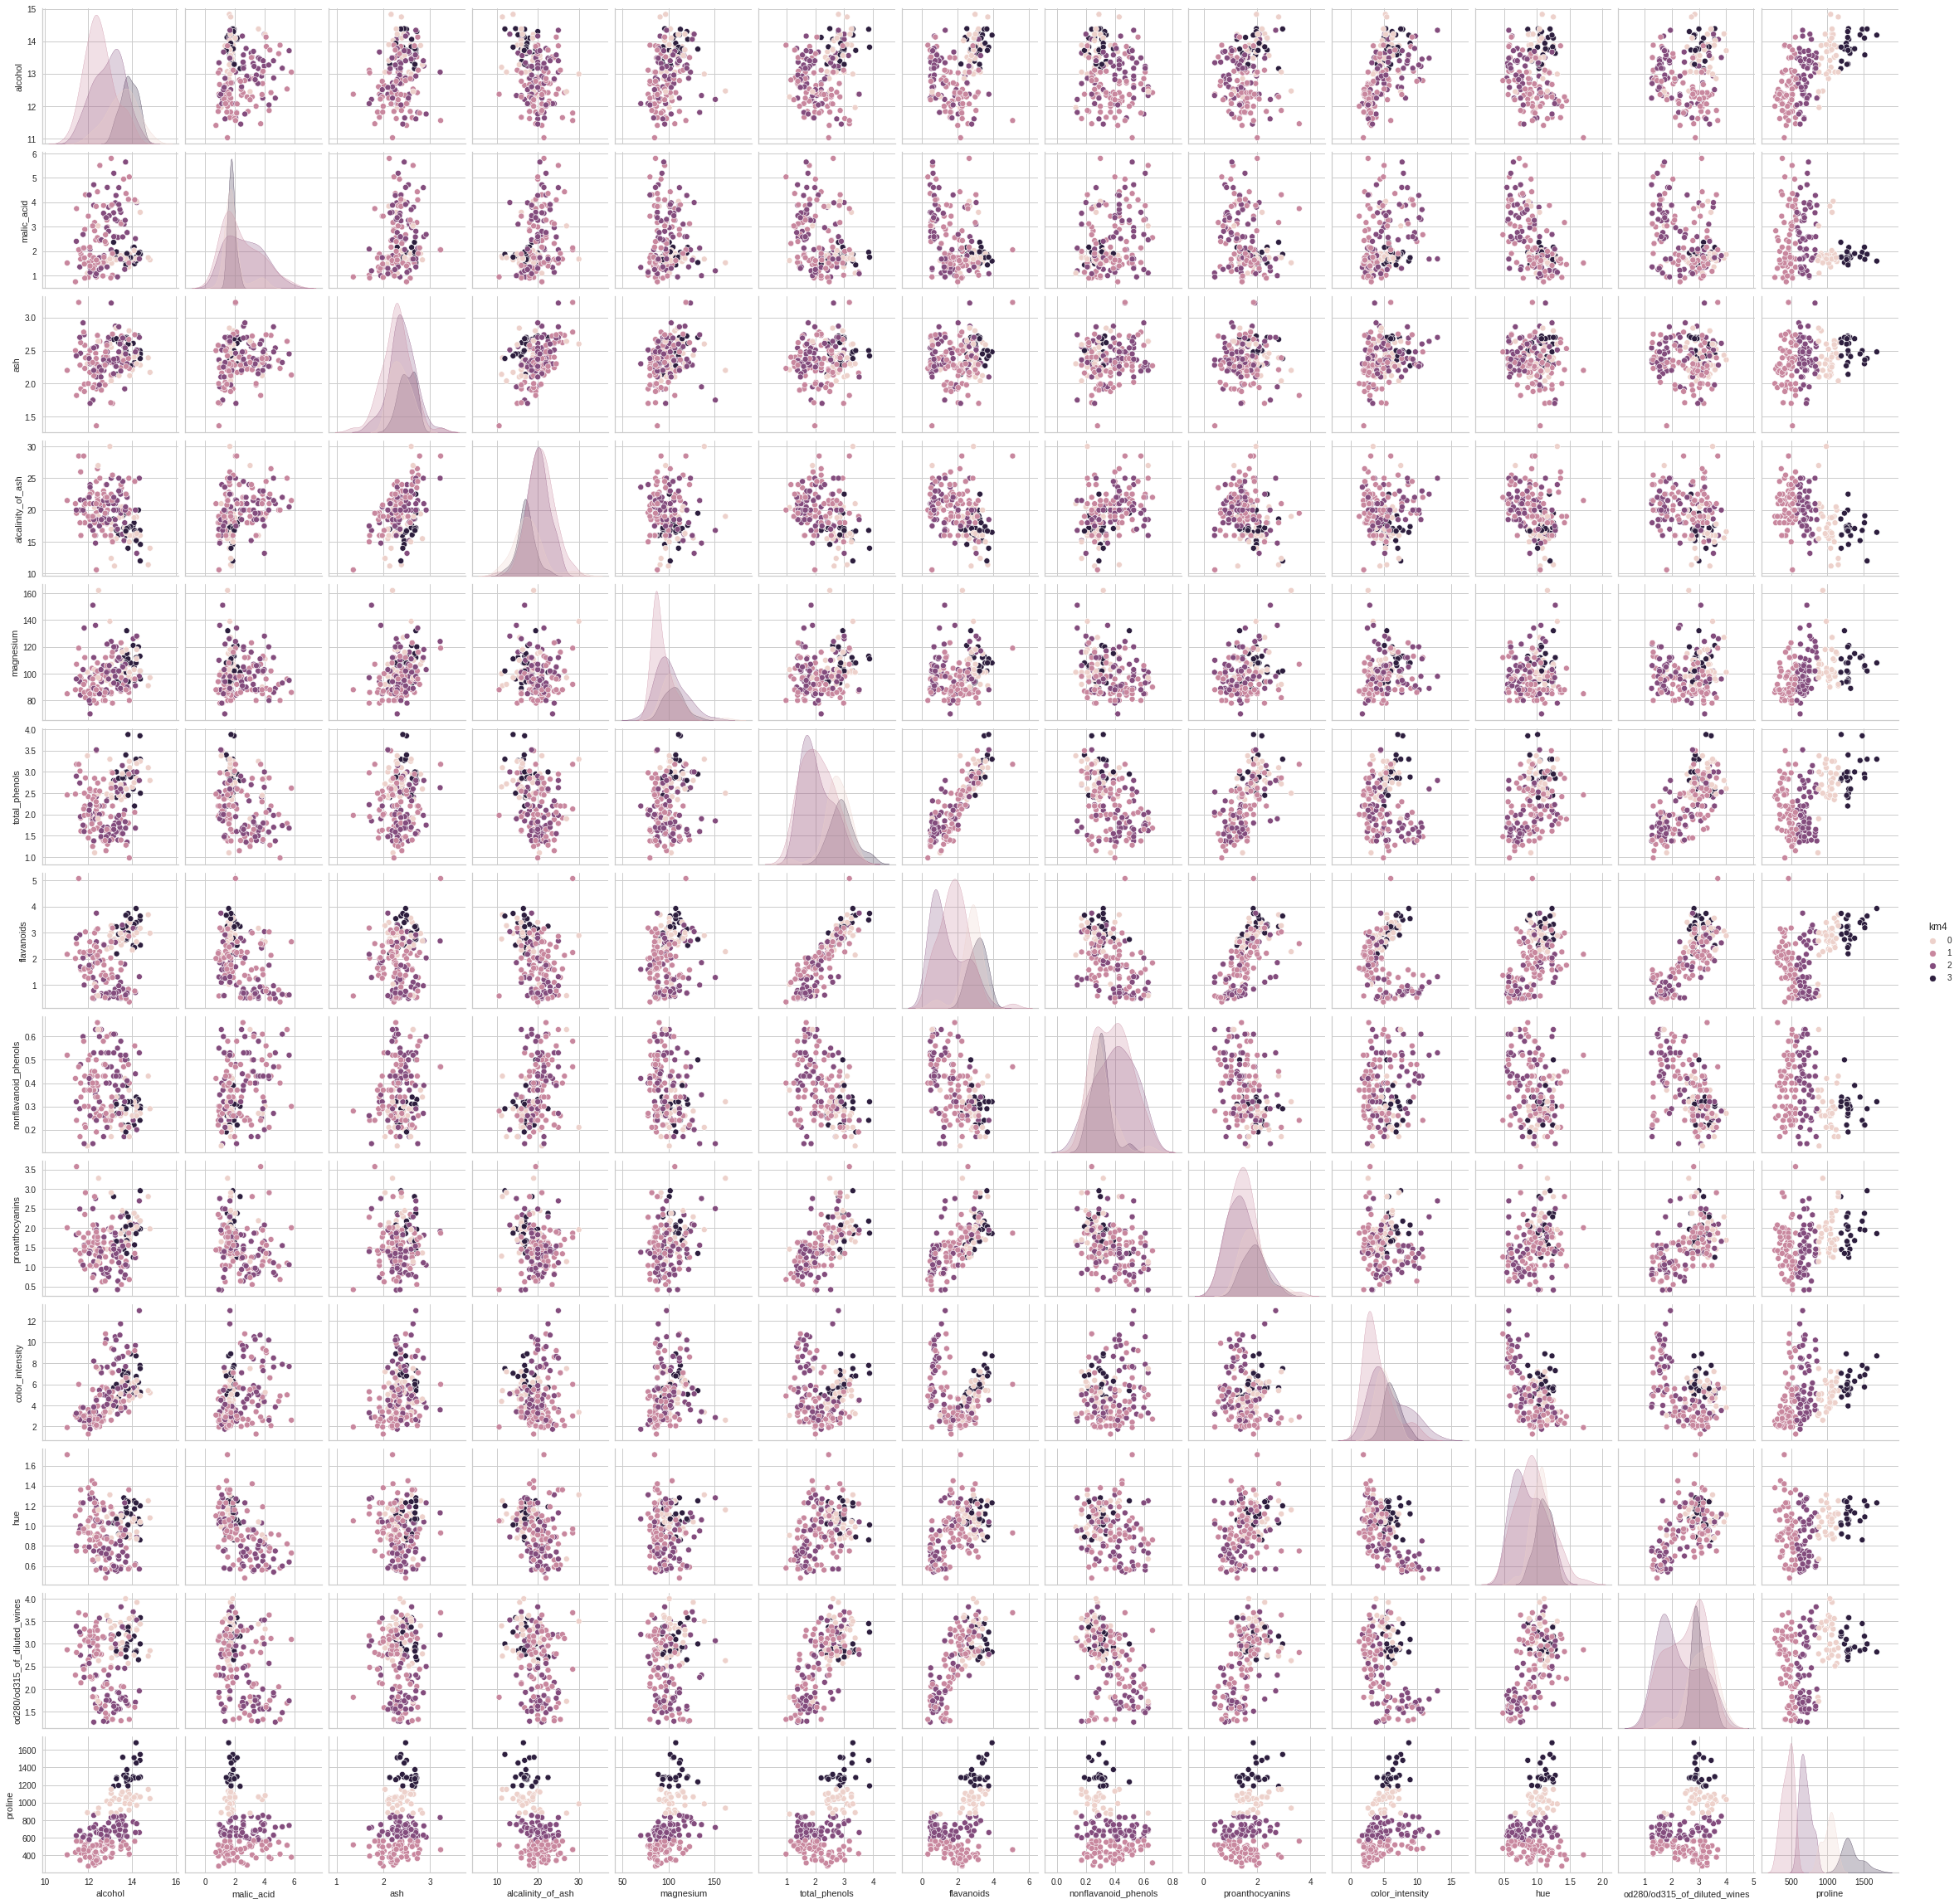

In [71]:
df = pd.DataFrame(X, columns=data['feature_names'])
km4 = KMeans(n_clusters=4)
km4.fit(df)
df["km4"]=km4.labels_

sns.pairplot(df, hue="km4", vars=df.columns[:-1]);

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [70]:
pca = PCA(2)
X_pca = pca.fit_transform(X)

# L comprehension
x0_pca=[el[0] for el in X_pca]
x1_pca=[el[1] for el in X_pca]


df["x0_pca"]=x0_pca
df["x1_pca"]=x1_pca
sns.scatterplot(x=df["x0_pca"],y=df["x1_pca"],hue=df["km4"], palette="deep");

KeyError: 'km4'

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.